In [58]:
from qiskit import *
from qiskit_aer import *
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

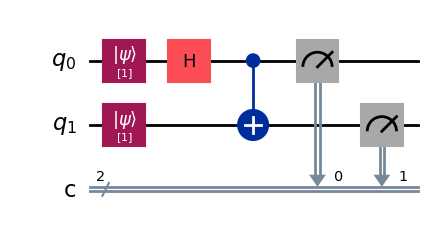

In [52]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2,2)
qc.initialize(1, 0)
qc.initialize(1,1)
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.measure(0,0)
qc.measure(1,1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [53]:
simulator = Aer.get_backend("qasm_simulator")

In [59]:
transpiler = transpile(qc, backend=simulator)
result = simulator.run(transpiler, shots=20000).result()
print(result)
counts = result.get_counts()
print(counts)

Result(backend_name='qasm_simulator', backend_version='0.15.1', qobj_id='', job_id='691cfaa2-d6e0-4ef2-b785-ffc001f88c00', success=True, results=[ExperimentResult(shots=20000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 10227, '0x2': 9773}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-9389', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=861513372, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0315064, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16179, 'measure_sampling': False, 'noise': 'ideal', 'parallel_shots': 8, 'parallel_state_update': 1, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0315064)], date=2024-11-12T15:06:51.998255, status=COMPL

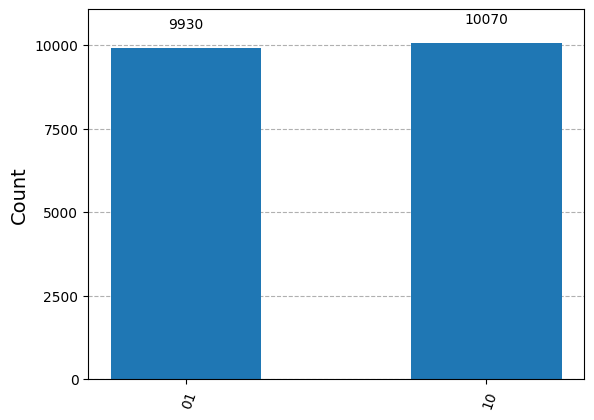

In [57]:
qiskit.visualization.plot_histogram(counts)